# Oefentoets Computational Modelling
Deze oefentoets bestaat uit twee opdrachten met verschillende opgaven per opdracht. In de eerste opdracht gaan jullie aan de slag met het verkennen van een dataset en in de tweede opdracht met unsupervised learning. Voor deze oefentoets hebben jullie 60 minuten de tijd.

Lees de instructies hieronder goed door.

### Beantwoorden vragen
Licht jouw uitwerking toe. Documenteer belangrijke stukken code en licht jouw werkwijze toe. 

#### Code documenteren
Simpele code zoals het aanmaken van een leeg array of een train_test_split functie aanroepen hoeft niet toegelicht te worden, maar wanneer je iets doet dat belangrijk is om te begrijpen omdat het essentieel is voor de opdracht moet toegelicht worden. Leg dit uit m.b.v. commentaar bij de code.

#### Werkwijze toelichten
Om tot een oplossing te komen, voer je vaak meerdere stappen uit. Leg uit welke stappen je uitvoert, waarom deze stappen nodig zijn, de volgorde, etc. Gebruik hier voor een aparte 'Markdown' cel.

#### Gebruik van online bronnen
Je mag de documentatie van numpy, pandas, sklearn, etc. raadplegen. Je mag ook gebruik maken van websites als stackoverflow.com maar je mag geen code kopiëren van die sites.

Je mag ook gebruik maken van Copilot, ChatGPT of andere AI-tools maar je mag die code ook niet zomaar kopiëren: gebruik de resultaten van de prompts puur als inspiratie. Daarnaast moet je de prompts als bronvermelding noemen.

Je mag Copilot, ChatGPT of andere AI-tools **niet** gebruiken voor het documenteren, toelichten van de werkwijze of voor het beantwoorden van open vragen.

Bij het vermoeden van onrechtmatig gebruik van bronnen zal een individueel assessment volgen.

## Opdracht 1
In deze opdracht gaan jullie een dataset verkennen. We gebruiken hiervoor de IMDB movieset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('movie.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Opgave 1.1.**

Bepaal of de kolommen `['duration','gross','budget','imdb_score']` outliers bevatten. Zo ja, zijn het zwakke of sterke outliers?

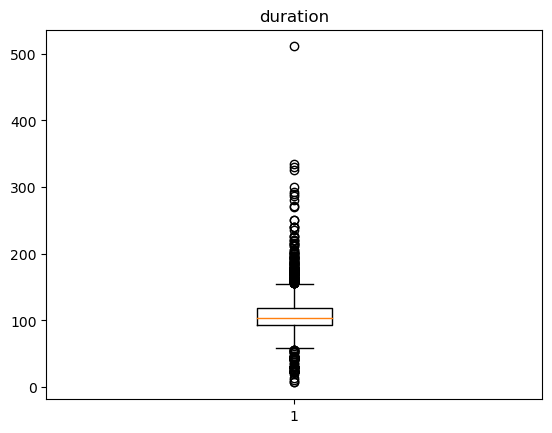

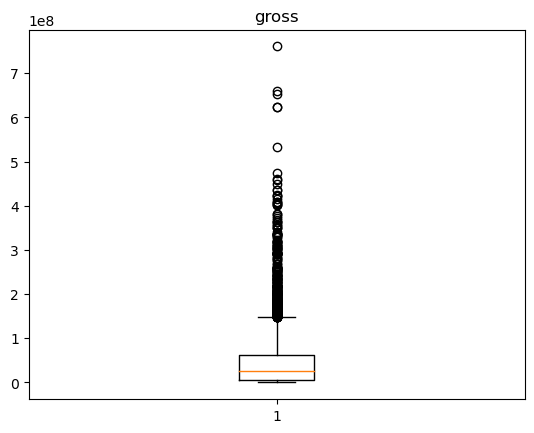

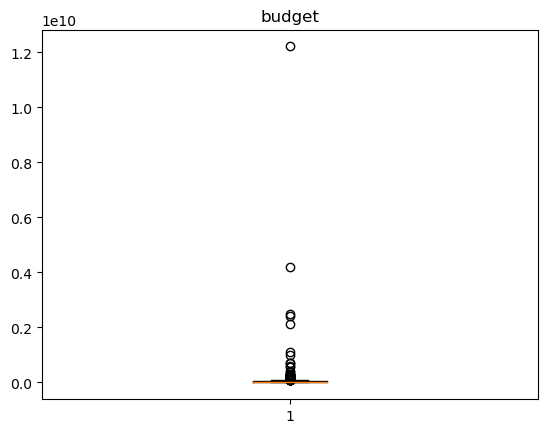

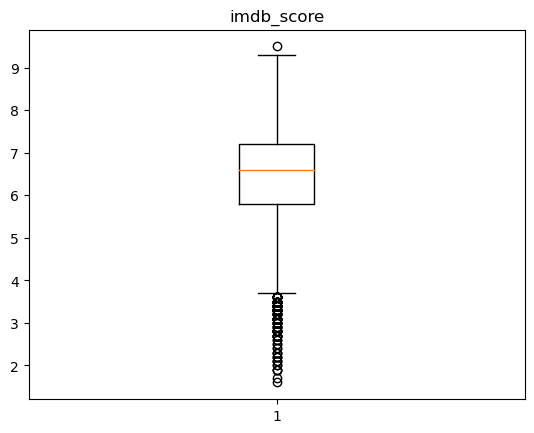

In [3]:
columns = ['duration','gross','budget','imdb_score']

# Ga door alle kolommen heen en plot een boxplot.
for col in columns:
    plt.figure()
#     Drop alle NaN values.
    data = df[col].dropna()
    plt.title(col)
    plt.boxplot(data)

Er zijn bij bijna alle kolommen outliers, bij duration en budget zie je dat er enkele outliers zijn die ver boven de rest komen.
Bij gross zie je dat er een paar films zijn die veel meer verdienen dan de rest.

**Opgave 1.2**

Bepaal het gemiddelde en de mediaan van `gross`. Verklaar hoe het mogelijk is dat er een verschil is tussen deze twee waarden.

**Merk op:** voor het open deel van deze vraag mag je geen gebruik maken van Copilot, ChatGPT of andere AI-tools.

In [4]:
print(f'Gemiddelde van gross: {df["gross"].mean()}')
print(f'Mediaan van gross: {df["gross"].median()}')

Gemiddelde van gross: 48468407.52680933
Mediaan van gross: 25517500.0


Er is een groot verschil tussen het gemiddelde en de mediaan van gross omdat er outliers zijn die ver boven de rest uitsteken, dit haalt het gemiddelde heel erg omhoog.

**Opgave 1.3.**

Bepaal de correlatie tussen de kolommen `['duration','gross','budget', 'imdb_score']` onderling. Stel je gaat een model trainen met `imdb_score` als target variabele. Welke conclusies kun je dan trekken op basis van deze analyse.

In [5]:
df[['duration','gross','budget', 'imdb_score']].corr()

,duration,gross,budget,imdb_score
duration,1.000000,0.250298,0.074276,0.261662
gross,0.250298,1.000000,0.102179,0.198021
budget,0.074276,0.102179,1.000000,0.030688
imdb_score,0.261662,0.198021,0.030688,1.000000


De hoogste correlation score van imbd_score zijn duration en gross, budget heeft geen goede correlatie.

**Opgave 1.4.**

Toon de volgende gegevens:

1. Een overzicht van de gemiddelde IMDB scores per regisseur (`director_name`), aflopend gesorteerd
2. Een overzicht van de drie films met de langste duur
3. Een overzicht van de duur en IMDB score van alle Franstalige films (`language = 'French'`) uit 2014 en 2015
4. Uitbreiding op vraag 3: toon de gemiddelde duur en IMDB score van deze films

In [6]:
# Groepeer de df op director_name en sorteer de gemiddelden op imdb_score.
dir_group = df[['director_name', 'imdb_score']].groupby('director_name')
display(dir_group.mean().sort_values('imdb_score', ascending=False))

amount = 3
# Sorteer de df op duration.
dur_sorted_df = df[['movie_title', 'duration']].sort_values('duration', ascending=False)
print(f'Langste {amount} films:')
for i in range(amount):
#     Pak de movie_title en duration van de index i van de gesorteerde df.
    title = dur_sorted_df.iloc[i]["movie_title"]
    duration = dur_sorted_df.iloc[i]["duration"]
    print(f'De film {title} is {duration} minuten lang.')

# Filter de df op language en title year.
french_movie_df = df[(df.language == 'French') & ((df.title_year == 2014) | (df.title_year == 2015))]
french_movie_df = french_movie_df[['movie_title', 'language', 'imdb_score', 'duration', 'title_year']]

display(french_movie_df)
print(f'De gemiddelde duur van de franse films is {french_movie_df["duration"].mean()} minuten en de gemiddelde imdb score is {french_movie_df["imdb_score"].mean()}.')


,imdb_score
director_name,
John Blanchard,9.5
Mitchell Altieri,8.7
Sadyk Sher-Niyaz,8.7
Cary Bell,8.7
Mike Mayhall,8.6
...,...
Georgia Hilton,2.2
Vondie Curtis-Hall,2.1
Frédéric Auburtin,2.0


Langste 3 films:
De film Trapped              is 511.0 minuten lang.
De film Carlos              is 334.0 minuten lang.
De film Blood In, Blood Out  is 330.0 minuten lang.


,movie_title,language,imdb_score,duration,title_year
489,Evolution,French,6.4,81.0,2015.0
1178,Animal Kingdom: Let's go Ape,French,4.9,101.0,2015.0
3088,La Famille Bélier,French,7.4,106.0,2014.0
3313,Barbecue,French,6.1,98.0,2014.0
3437,Far from Men,French,7.3,101.0,2014.0
4455,The Blue Room,French,6.3,76.0,2014.0
4714,They Will Have to Kill Us First,French,7.7,105.0,2015.0


De gemiddelde duur van de franse films is 95.42857142857143 minuten en de gemiddelde imdb score is 6.585714285714286.


## Opdracht 2
In deze opdracht gaan jullie een model trainen met behulp van unsupervised learning.

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [8]:
#X is een random gemaakt numpy array met twee features
X, _ = make_blobs(n_samples=400, centers=7,
                       cluster_std=0.90, random_state=0)

**Opgave 2.1**

Maak een visualisatie die de relatie tussen de twee features in X weergeeft. Zijn er relaties of verbanden te zien?

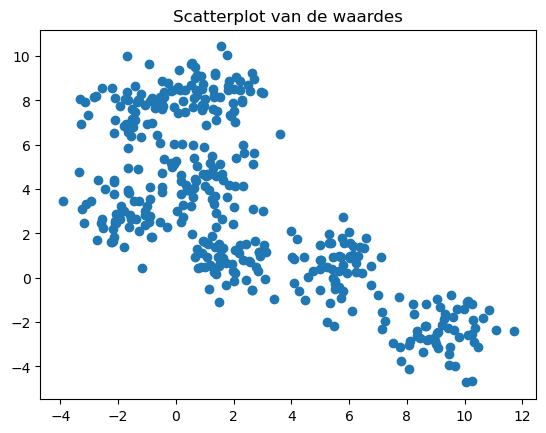

In [9]:
X1, X2 = np.split(X, 2, axis=1)
plt.scatter(X1, X2)
plt.title('Scatterplot van de waardes')
plt.show()

**Opgave 2.2.**

Gebruik `KMeans` om een clustering te maken van de punten in array `X`. Kies voor `k` = 5.

In [10]:
model_kMeans = KMeans()
number_clusters = 5
# Zet de parameters van het model.
model_kMeans.set_params(n_clusters = number_clusters, random_state = 0)
# Fit het model met de data.
model_kMeans.fit(X)
# Maak de predictions met de data.
prediction_kMeans = model_kMeans.fit_predict(X)

print(prediction_kMeans)

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[1 2 4 3 2 4 3 2 1 1 0 3 1 0 1 1 2 3 3 3 2 3 4 3 4 0 0 1 3 2 3 0 4 2 2 3 0
 3 3 4 1 1 2 4 4 4 1 2 0 3 2 3 0 4 3 0 1 1 1 3 2 4 3 3 3 1 0 3 2 3 1 3 3 3
 3 0 4 4 0 4 4 3 1 4 2 4 0 1 2 3 3 1 4 0 3 0 2 0 0 1 4 1 4 2 1 3 1 2 2 3 3
 4 4 1 4 4 0 3 1 0 3 1 1 4 2 1 4 0 2 3 1 3 3 1 1 1 1 3 1 0 1 4 1 2 3 2 1 3
 4 1 3 2 2 1 2 1 3 2 0 4 3 0 1 0 4 1 3 0 0 2 2 0 1 1 2 1 4 4 1 1 0 1 1 4 1
 1 1 1 1 1 2 0 2 1 1 1 2 1 1 4 1 3 2 3 3 2 1 3 3 1 2 3 4 1 3 1 1 1 4 0 3 4
 3 1 4 0 1 1 3 0 3 3 1 3 0 2 0 1 0 3 4 2 1 1 3 1 0 2 3 1 3 3 1 1 0 2 3 2 0
 1 1 3 0 1 3 3 2 0 1 1 3 3 1 2 1 0 0 0 0 0 0 0 4 4 4 3 2 0 3 1 3 1 3 1 1 1
 4 1 3 3 4 1 1 2 0 3 2 3 3 0 0 2 4 4 0 4 3 4 3 1 1 1 3 1 1 3 1 3 3 1 2 1 3
 4 3 2 2 1 4 4 4 3 4 4 3 1 0 2 3 2 1 0 1 1 1 1 0 3 3 1 3 2 1 4 0 3 1 1 3 3
 0 2 1 1 1 4 2 3 1 3 1 3 1 1 2 0 4 1 4 0 4 1 2 0 2 3 3 1 3 1]


**Opgave 2.3.**

Bepaal de score van gevonden clustering.

In [11]:
model_kMeans.score(X)

-1081.2223142592732

**Opgave 2.4.**

Pas de scatterplot van opgave 2.1 aan en visualiseer de gevonden clusters.

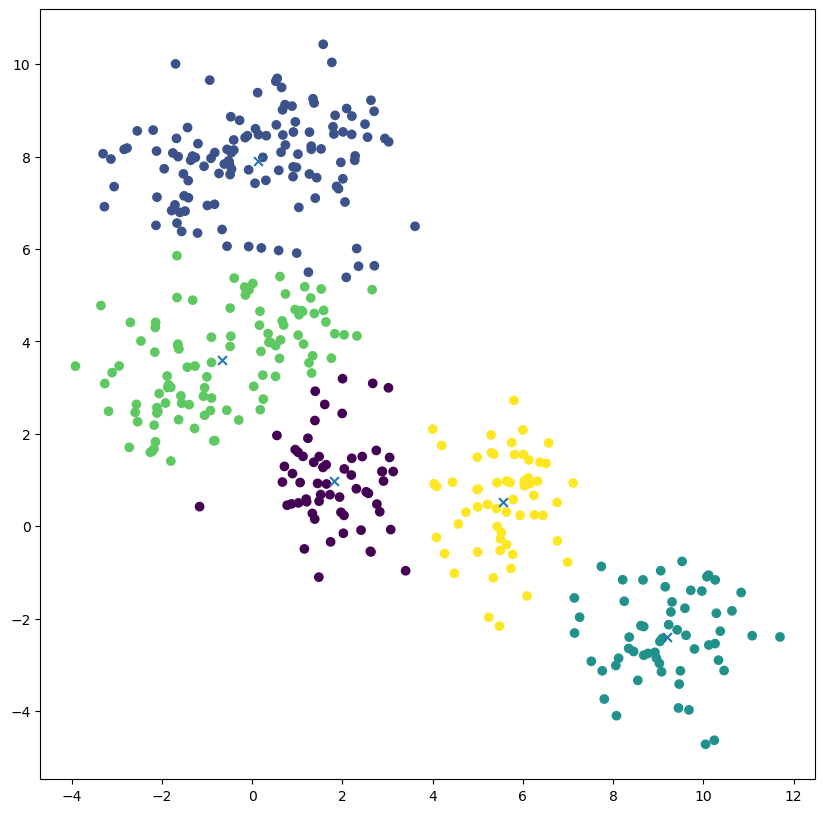

In [12]:
plt.scatter(X[:,0],X[:,1],marker='o', c=prediction_kMeans)
plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

**Opgave 2.5.**

Maak een clustering voor `k` = 1 t/m 20. Geef aan voor welke `k` de clustering het _beste_ is. Onderbouw wat je onder het _beste_ verstaat.

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

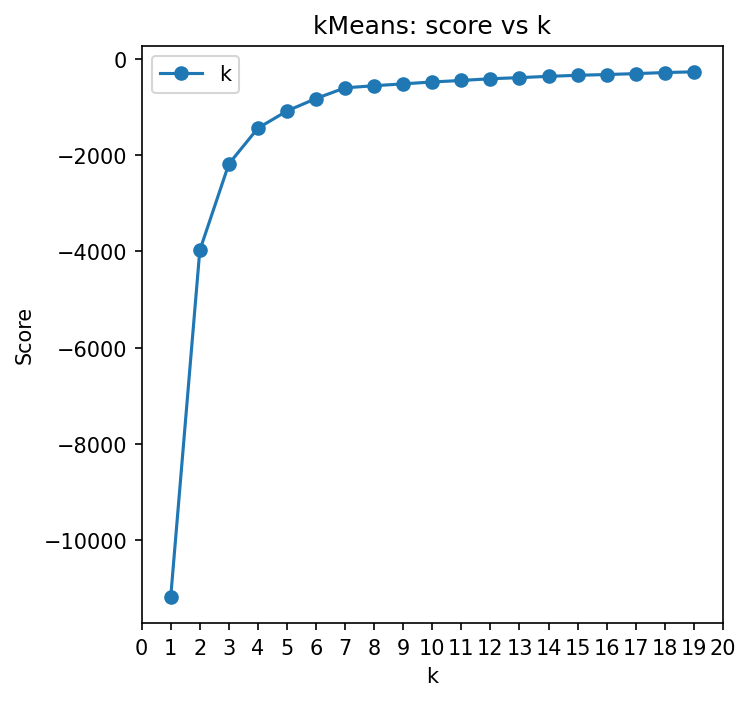

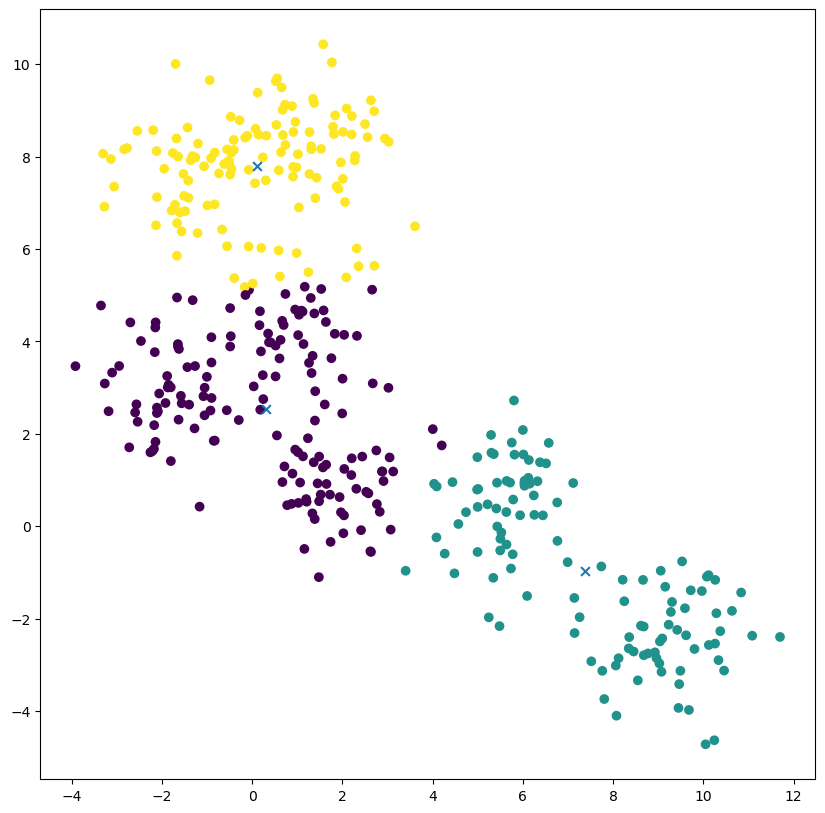

In [13]:
data = []

max_n = 20

for i in range(1, max_n):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_kMeans.fit_predict(X)
    data.append([i, model_kMeans.score(X)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df['k'], df['Score'], '-o')

ax.legend(['k'])

number_clusters = 3
model_kMeans.set_params(n_clusters = number_clusters, random_state = 0)
model_kMeans.fit(X)
prediction_kMeans = model_kMeans.fit_predict(X)
plt.show()

plt.scatter(X[:,0],X[:,1],marker='o', c=prediction_kMeans)
plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

3 Clusters is het beste want in de score grafiek heeft dat de grootste 'knik'.

**Opgave 2.6.**

Maak ook een clustering met `GaussianMixture` met de in opgave 2.5 gekozen `k`. 

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


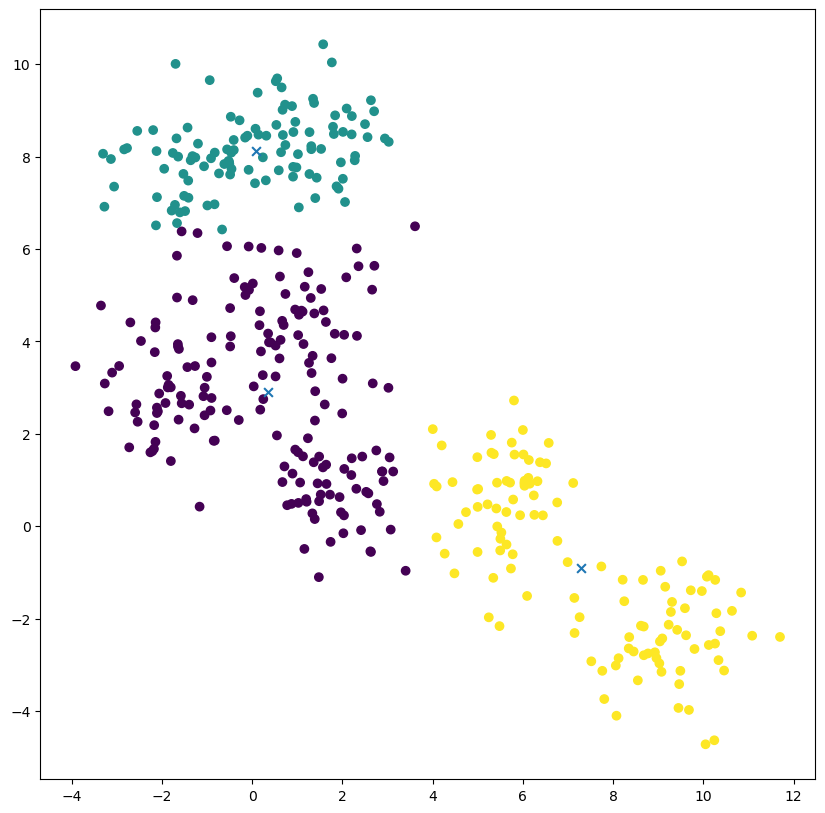

In [14]:
model_gmm = GaussianMixture()

number_clusters = 3
# Zet de parameters van het model.
model_gmm.set_params(n_components = number_clusters, random_state = 0)
# Fit het model met de data.
model_gmm.fit(X)
# Maak de prediction met de data.
prediction_gmm = model_gmm.predict(X)

# Scatterpot maken met middelpunt.
plt.scatter(X[:,0], X[:,1],marker='o', c=prediction_gmm)
plt.scatter(model_gmm.means_[:,0],model_gmm.means_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

**Opgave 2.7.**

Hoeveel punten uit X worden door `KMeans` en `GaussianMixture` in verschillende clusters ingedeeld. 

In [15]:
kMeans_count = {}
gmm_count = {}

for i in prediction_kMeans:
    if i in kMeans_count: # Als i in kMeans_count, +1, zo niet, maak aan.
        kMeans_count[i] += 1
    else:
        kMeans_count[i] = 1

for i in prediction_gmm:
    if i in gmm_count: # Als i in gmm_count, +1, zo niet, maak aan.
        gmm_count[i] += 1
    else:
        gmm_count[i] = 1
        
print(f'kMeans counts: {kMeans_count}')
print(f'gmm counts: {gmm_count}')

kMeans counts: {2: 127, 1: 116, 0: 157}
gmm counts: {1: 109, 2: 117, 0: 174}


## Einde toets
Voer `Restart & Run All` uit onder `Kernel` en check of er geen errors zijn.